<a href="https://colab.research.google.com/github/MS-H2020/Open/blob/main/Visible_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [ニューラルネットワークの学習過程を可視化してみよう](https://rightcode.co.jp/blog/information-technology/neural-network-learning-visualization)



In [2]:
from __future__ import absolute_import, division, print_function,unicode_literals
# TensorFlow、Keras
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
# ヘルパーライブラリ
import numpy as np
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()
# モデルを訓練するときのためにサイズを変更する
x_train.resize(60000, 28, 28, 1)
x_test.resize(10000, 28, 28, 1)

print(x_train.shape, y_train.shape)  # (60000, 28, 28, 1) (60000,)
print(x_test.shape, y_test.shape)  # (10000, 28, 28, 1) (10000,)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28, 1) (60000,)
(10000, 28, 28, 1) (10000,)


In [3]:
x_train = x_train / 255.0
x_test = x_test / 255.0

print('Max:', x_train.max(), ', Min:', x_train.min())  # Max: 1.0 , Min: 0.0
print('Max:', x_test.max(), ', Min:', x_test.min())  # Max: 1.0 , Min: 0.0

Max: 1.0 , Min: 0.0
Max: 1.0 , Min: 0.0


In [5]:
model = models.Sequential([
    layers.Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)),  # 畳み込み
    layers.MaxPooling2D((2, 2)),  # プーリング
    layers.Flatten(),  #ベクトル化
    layers.Dense(10, activation='softmax')  # 出力
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 16)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 2704)              0         
                                                                 
 dense_1 (Dense)             (None, 10)                27050     
                                                                 
Total params: 27210 (106.29 KB)
Trainable params: 27210 (106.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [6]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2546 - accuracy: 0.9299 - val_loss: 0.1077 - val_accuracy: 0.9689
Epoch 2/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0937 - accuracy: 0.9732 - val_loss: 0.0761 - val_accuracy: 0.9759
Epoch 3/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0699 - accuracy: 0.9798 - val_loss: 0.0652 - val_accuracy: 0.9791
Epoch 4/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0589 - accuracy: 0.9827 - val_loss: 0.0625 - val_accuracy: 0.9812
Epoch 5/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0504 - accuracy: 0.9850 - val_loss: 0.0610 - val_accuracy: 0.9801
Epoch 6/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0452 - accuracy: 0.9865 - val_loss: 0.0575 - val_accuracy: 0.9809
Epoch 7/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0400 - accuracy: 0.9877 - val_loss: 0.0545 - val

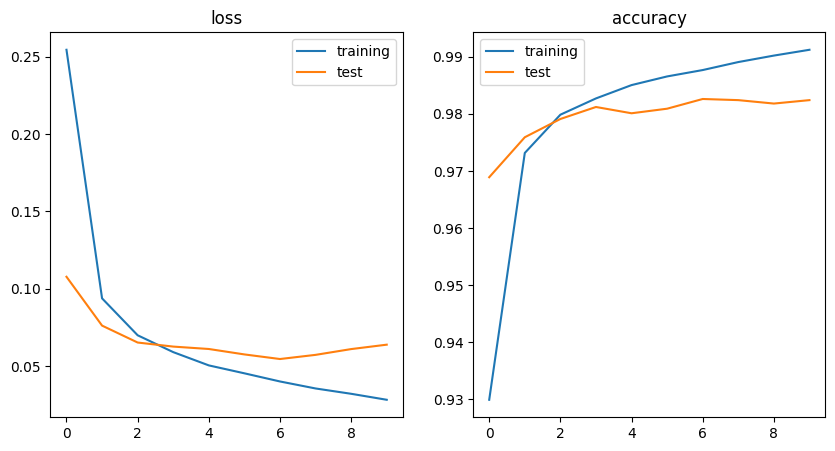

In [7]:
metrics = ['loss', 'accuracy']  # 使用する評価関数を指定

plt.figure(figsize=(10, 5))  # グラフを表示するスペースを用意

for i in range(len(metrics)):

    metric = metrics[i]

    plt.subplot(1, 2, i+1)  # figureを1×2のスペースに分け、i+1番目のスペースを使う
    plt.title(metric)  # グラフのタイトルを表示

    plt_train = history.history[metric]  # historyから訓練データの評価を取り出す
    plt_test = history.history['val_' + metric]  # historyからテストデータの評価を取り出す

    plt.plot(plt_train, label='training')  # 訓練データの評価をグラフにプロット
    plt.plot(plt_test, label='test')  # テストデータの評価をグラフにプロット
    plt.legend()  # ラベルの表示

plt.show()  # グラフの表示